In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_rent = pd.read_csv('../data/iProperty_rent_to_be_trained.csv')
df_sale = pd.read_csv('../data/iProperty_sale_to_be_trained.csv')

## RENT

In [3]:
df_rent.head()

,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"M Vertica, Taman Maluri, Cheras",1400,1.65,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,1
1,"M Vertica, Taman Maluri, Cheras",1700,2.00,Cheras,Kuala Lumpur,Condominium,Default,850,3,2,2
2,"Desa Green, Taman Desa",1800,2.52,Taman Desa,Kuala Lumpur,Serviced Residence,Studio,715,2,2,1
3,"Arcoris Residences, Mont Kiara",5000,5.51,Mont Kiara,Kuala Lumpur,Serviced Residence,Intermediate,907,2,2,1
4,"Desa Green, Taman Desa",1400,2.42,Taman Desa,Kuala Lumpur,Serviced Residence,Default,578,1,1,1


In [23]:
for col in ['price']:
    q_low   = df_rent[col].quantile(0.01)
    q_hi    = df_rent[col].quantile(0.99)
    df_rent = df_rent[(df_rent[col] < q_hi) & (df_rent[col] > q_low)]

df_rent = df_rent[df_rent['carpark'] <= 10]

### 0. RENT DATA Correlation heatmap

Text(0.5, 1.0, 'RENT DATA Correlation Heatmap')

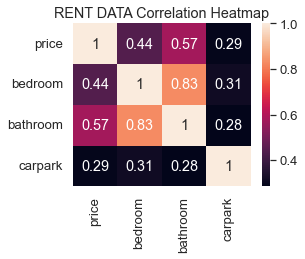

In [5]:
sns.set(rc={'figure.figsize':(4,3)}, font_scale=1.2)
p = sns.heatmap(data=df_rent.drop(['psf','area'],axis=1).corr(), annot=True)
p.set_title("RENT DATA Correlation Heatmap")

### 1. Rent Price vs State

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

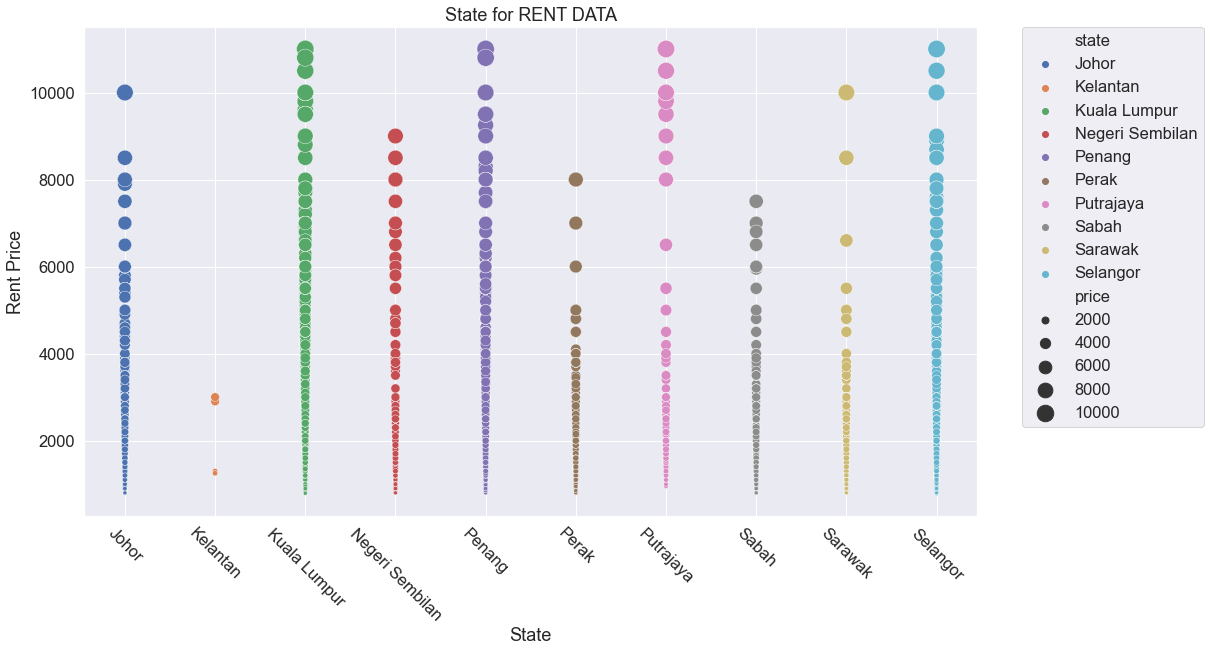

In [24]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_rent.sort_values(by=['state']), x='state', y='price', hue='state', size='price', sizes=(15,300))
p.set_xlabel("State")
p.set_ylabel("Rent Price")
p.set_title("State for RENT DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=-45)

### 2. Rent Price vs Property Type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

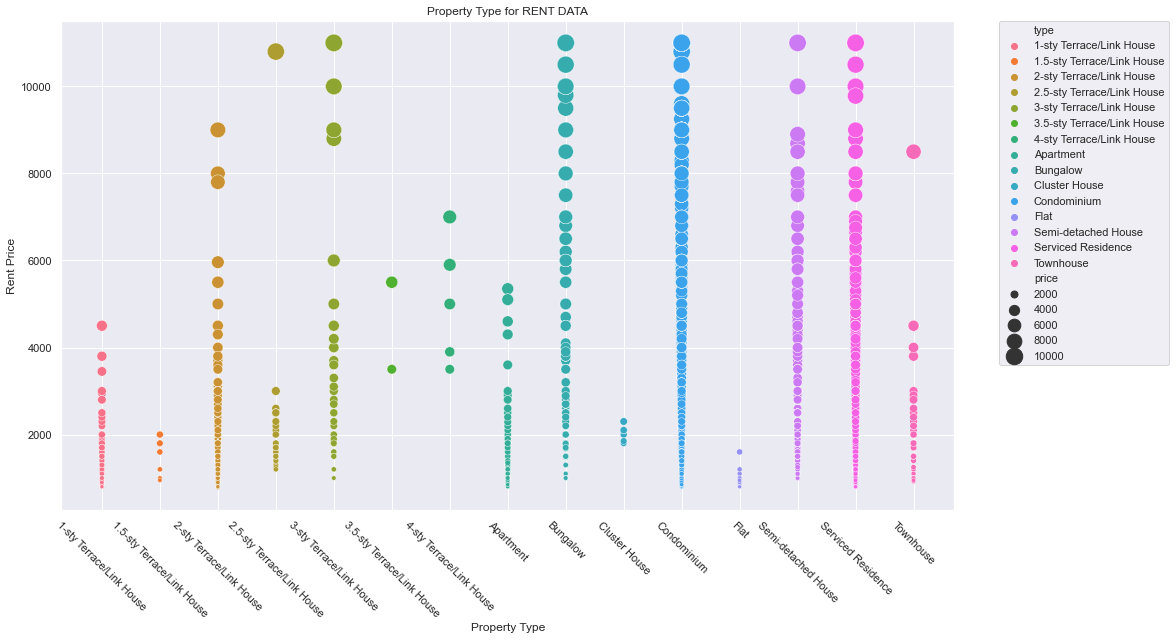

In [25]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1)
p = sns.scatterplot(data=df_rent.sort_values(by=['type']), x='type', y='price', hue='type', size='price', sizes=(15,300))
p.set_xlabel("Property Type")
p.set_ylabel("Rent Price")
p.set_title("Property Type for RENT DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=-45)

### 3. Rent Price vs Bedroom

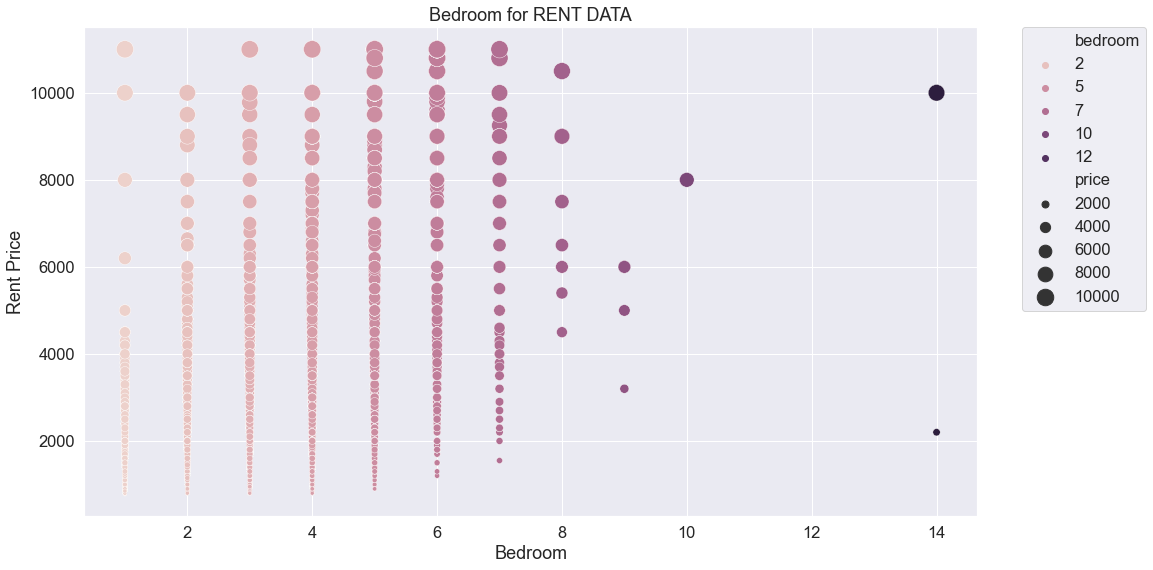

In [26]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_rent, x='bedroom', y='price', hue='bedroom', size='price', sizes=(15,300))
p.set_xlabel("Bedroom")
p.set_ylabel("Rent Price")
p.set_title("Bedroom for RENT DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 4. Rent Price vs Bathroom

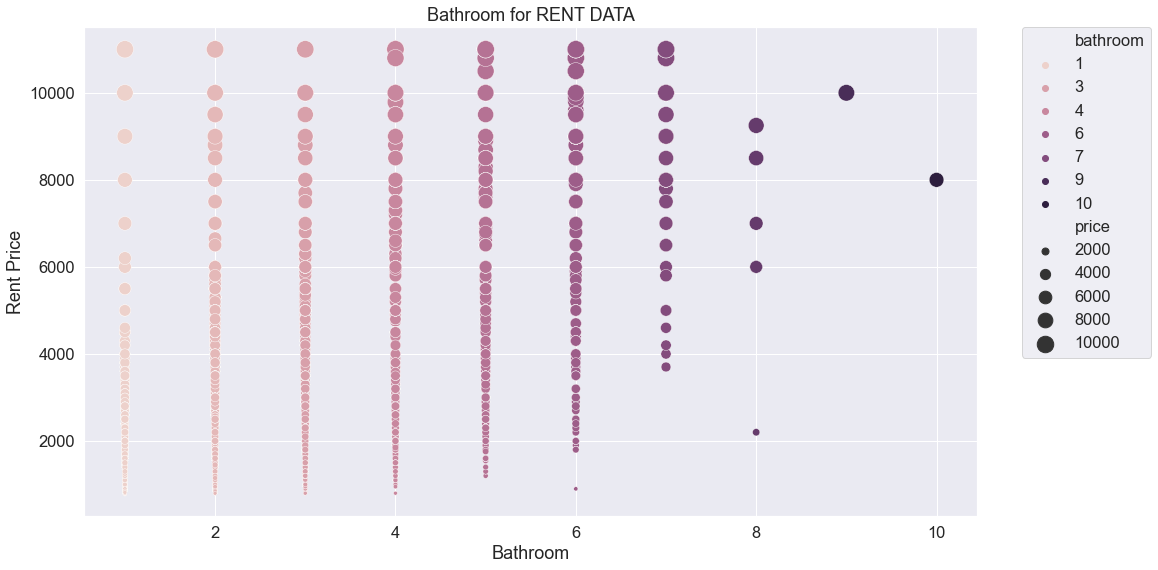

In [27]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_rent, x='bathroom', y='price', hue='bathroom', size='price', sizes=(15,300))
p.set_xlabel("Bathroom")
p.set_ylabel("Rent Price")
p.set_title("Bathroom for RENT DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 5. Rent Price vs Carpark

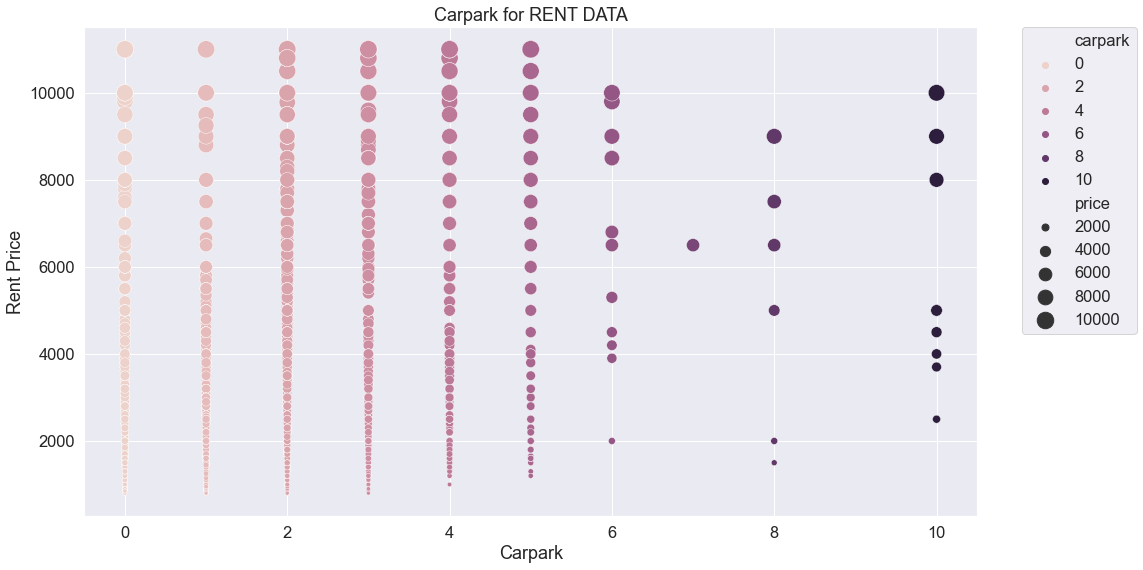

In [28]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_rent, x='carpark', y='price', hue='carpark', size='price', sizes=(15,300))
p.set_xlabel("Carpark")
p.set_ylabel("Rent Price")
p.set_title("Carpark for RENT DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## SALE

In [11]:
df_sale.head()

,name,price,psf,district,state,type,details,area,bedroom,bathroom,carpark
0,"The Park Sky Residence, Bukit Jalil",1150000,1042.61,Bukit Jalil,Kuala Lumpur,Serviced Residence,Corner lot,1103,3,2,2
1,"Bukit Damansara, Damansara Heights",1650000,717.39,Damansara Heights,Kuala Lumpur,2-sty Terrace/Link House,Intermediate,2300,4,3,2
2,"The Binjai on the Park, KL City Centre, KLCC",6888888,2140.74,KLCC,Kuala Lumpur,Condominium,Corner lot,3218,4,4,3
3,"AMELIA, DESA PARKCITY, Desa ParkCity",2700000,1026.62,Desa ParkCity,Kuala Lumpur,2-sty Terrace/Link House,Default,2630,4,4,2
4,"AMELIA, DESA PARKCITY, Desa ParkCity",2800000,1076.92,Desa ParkCity,Kuala Lumpur,2-sty Terrace/Link House,Default,2600,4,4,2


In [12]:
for col in ['price']:
    q_low   = df_sale[col].quantile(0.01)
    q_hi    = df_sale[col].quantile(0.99)
    df_sale = df_sale[(df_sale[col] < q_hi) & (df_sale[col] > q_low)]

### 0. SALE DATA Correlation Heatmap

Text(0.5, 1.0, 'SALE DATA Correlation Heatmap')

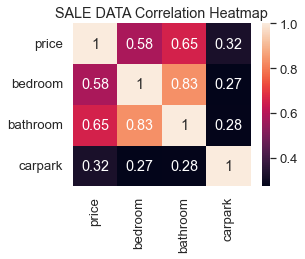

In [13]:
sns.set(rc={'figure.figsize':(4,3)}, font_scale=1.2)
p = sns.heatmap(data=df_sale.drop(['psf','area'],axis=1).corr(), annot=True)
p.set_title("SALE DATA Correlation Heatmap")

### 1. Sale Price vs State

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

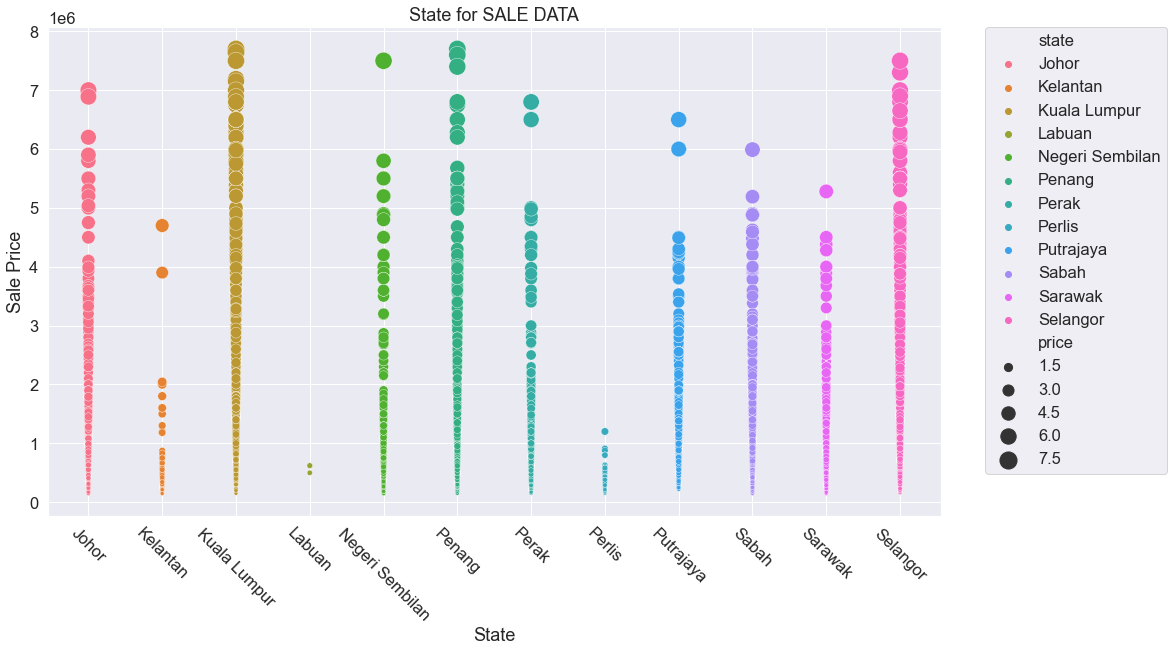

In [20]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_sale.sort_values(by=['state']), x='state', y='price', hue='state', size='price', sizes=(15,300))
p.set_xlabel("State")
p.set_ylabel("Sale Price")
p.set_title("State for SALE DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=-45)

### 2. Sale Price vs Type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

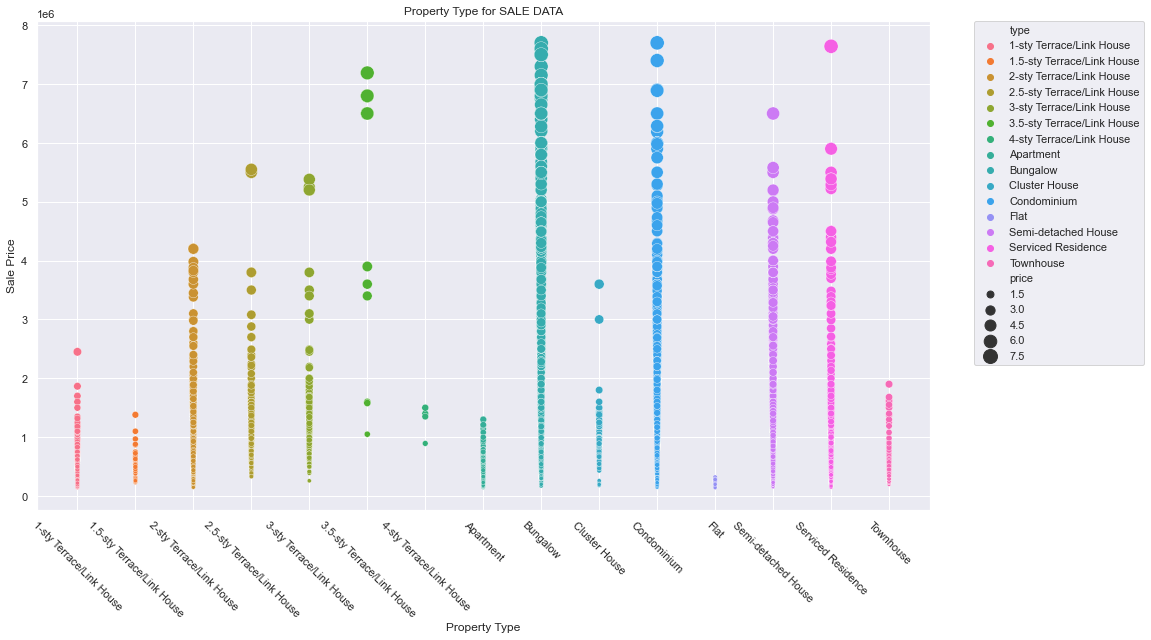

In [21]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1)
p = sns.scatterplot(data=df_sale.sort_values(by=['type']), x='type', y='price', hue='type', size='price', sizes=(15,200))
p.set_xlabel("Property Type")
p.set_ylabel("Sale Price")
p.set_title("Property Type for SALE DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=-45)

### 3. Sale Price vs Bedroom

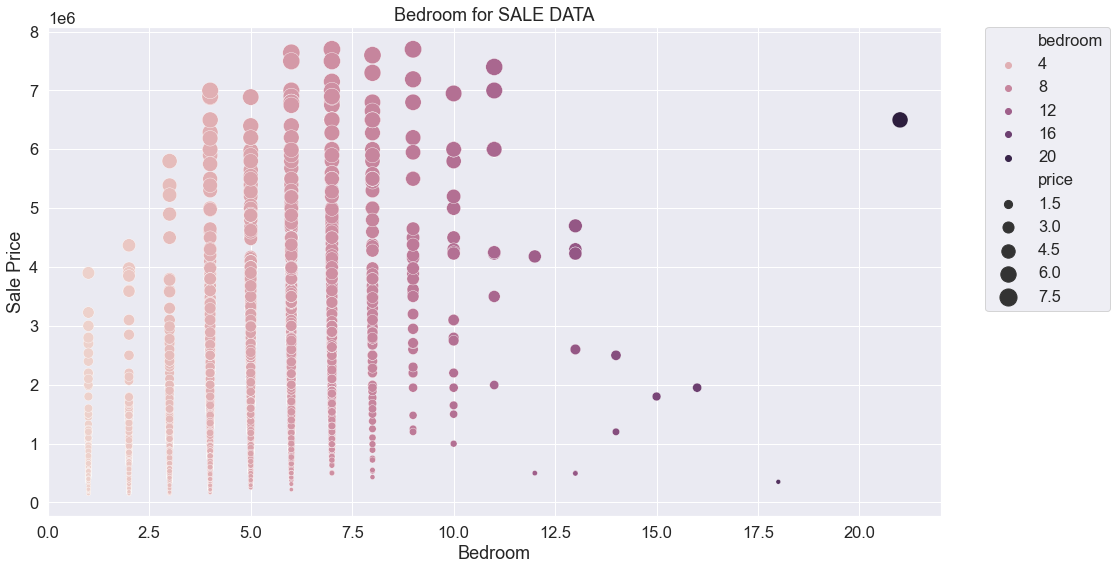

In [16]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_sale, x='bedroom', y='price', hue='bedroom', size='price', sizes=(15,300))
p.set_xlabel("Bedroom")
p.set_ylabel("Sale Price")
p.set_title("Bedroom for SALE DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 4. Sale Price vs Bathroom

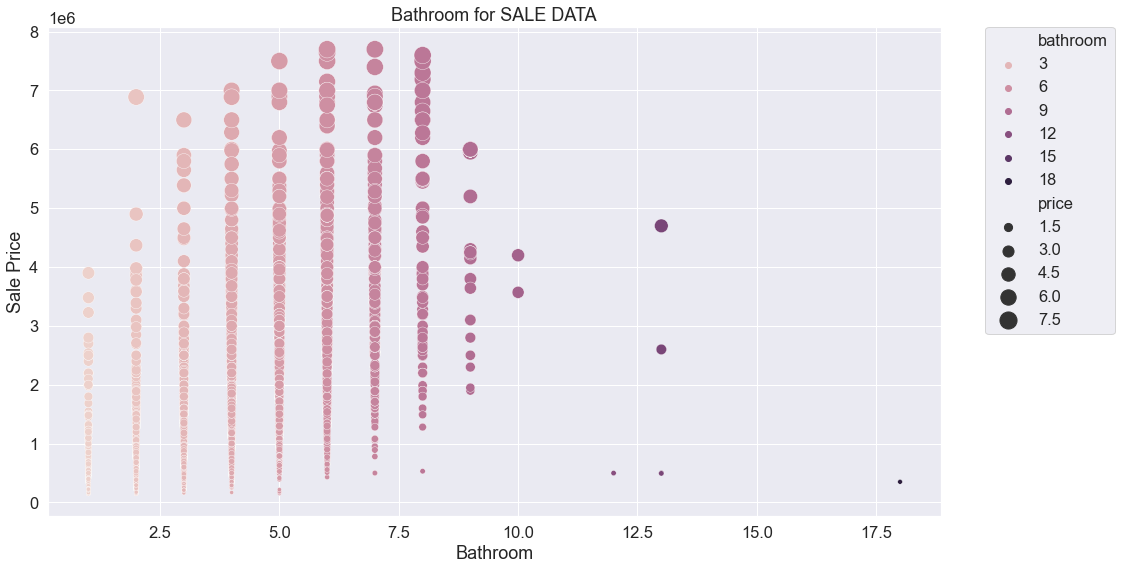

In [17]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_sale, x='bathroom', y='price', hue='bathroom', size='price', sizes=(15,300))
p.set_xlabel("Bathroom")
p.set_ylabel("Sale Price")
p.set_title("Bathroom for SALE DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### 5. Sale Price vs Carpark

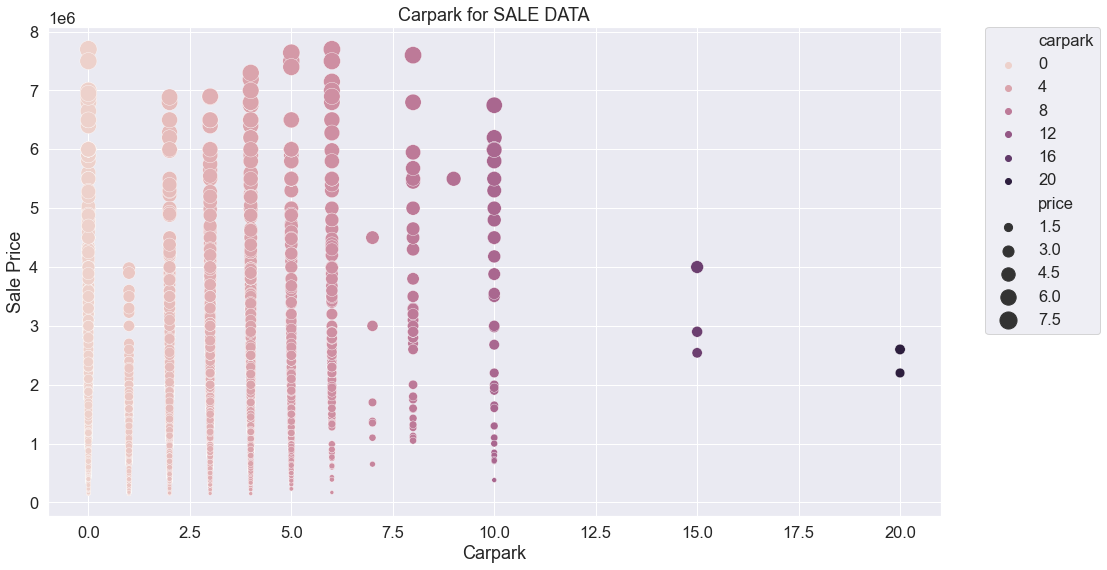

In [18]:
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5)
p = sns.scatterplot(data=df_sale, x='carpark', y='price', hue='carpark', size='price', sizes=(15,300))
p.set_xlabel("Carpark")
p.set_ylabel("Sale Price")
p.set_title("Carpark for SALE DATA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)